# **МЛ. Лабораторная работа 2.**

Выполнила Сектименко Ирина, студент группы М8О-310Б

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Подготовка данных

Загрузим файл "train.csv" с обучающей выборкой.

In [255]:
x_train = pd.read_csv("train.csv")
x_test = pd.read_csv("test.csv")
x_train.info()
x_train.LoanApproved.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

array([ 0.,  1., nan])

### Обработка пропусков и дубликатов

Удалим пропуски и дубликаты.

In [256]:
x_train.dropna(how='any', inplace=True)
x_train = x_train.drop_duplicates(keep='last')

### Обработка выбросов

Простроим график для столбца RiskScore.

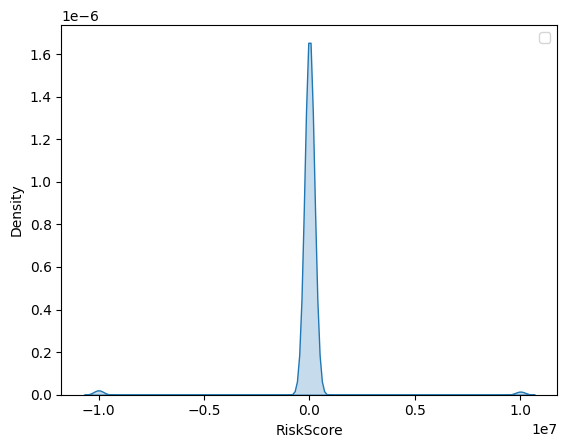

In [257]:
sns.kdeplot(x_train["RiskScore"], fill=True)
plt.legend()
plt.show()

Легко заметить, что у нас есть выбросы в районе +/-1e7. Сделаем фильрацию и построим новый график (в пределах 1e6).

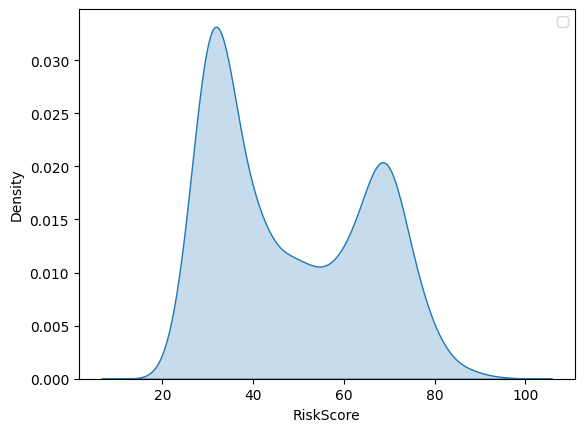

In [258]:
x_train = x_train.loc[abs(x_train['RiskScore']) < 1000000]
sns.kdeplot(x_train["RiskScore"], fill=True)
plt.legend()
plt.show()

### Обработка категориальных признаков

Столбец с датой (ApplicationDate), исходя из человеческой логики, не имеет значения. Не важно, когда человек взял кредит, а важно, какой человек взял кредит (какой у него характер, сколько у него денег, дорожит ли он жизнью и т. д.). Поэтому просто удалим этот столбец.

In [259]:
x_train.pop("ApplicationDate")
x_test.pop("ApplicationDate")
x_train

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,0.151985,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,0.175693,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,0.444605,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,0.188452,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,0.273431,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,47.0,88686.0,648.0,5472.0,12.0,Divorced,2.0,Rent,98.0,0.112650,...,Employed,Bachelor,23.0,121698.0,0.156472,0.164928,497.756143,0.080611,1.0,41.553066
11011,39.0,300000.0,850.0,7721.0,72.0,Divorced,5.0,Own,276.0,0.215136,...,Employed,Associate,16.0,18607.0,0.107721,0.108596,146.407421,0.016896,1.0,28.051757
11012,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,0.477742,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,0.322554,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170


Столбцы MaritalStatus, HomeOwnershipStatus, EmploymentStatus, EducationLevel, LoanPurpose содержат текстовые данные. При этом возможных вариантов заполнения каждого из этих столбцов не так уж много (3-5), поэтому используем One Hot encoding для каждого их этих столбцов. Столбец с пропусками просто удалим.

In [260]:
x_train = pd.get_dummies(x_train, columns=['MaritalStatus', 'HomeOwnershipStatus',
                                           'EmploymentStatus', 'EducationLevel',
                                           'LoanPurpose'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['MaritalStatus', 'HomeOwnershipStatus',
                                           'EmploymentStatus', 'EducationLevel',
                                           'LoanPurpose'], drop_first=True)
x_train

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,1.0,...,False,False,False,False,False,False,False,True,False,False
1,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,0.0,...,False,False,True,False,False,False,False,True,False,False
3,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,0.0,...,False,False,False,False,True,False,True,False,False,False
4,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,1.0,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,47.0,88686.0,648.0,5472.0,12.0,2.0,98.0,0.112650,8.0,1.0,...,False,False,True,False,False,False,False,False,True,False
11011,39.0,300000.0,850.0,7721.0,72.0,5.0,276.0,0.215136,2.0,1.0,...,False,False,False,False,False,False,False,False,True,False
11012,57.0,300000.0,850.0,14756.0,48.0,2.0,620.0,0.477742,1.0,3.0,...,False,False,False,False,False,False,False,True,False,False
11013,28.0,15000.0,300.0,51361.0,96.0,1.0,696.0,0.322554,2.0,0.0,...,False,False,True,False,False,False,False,False,True,False


### Обработка линейной зависимости признаков

Построим корреляционную матрицу.

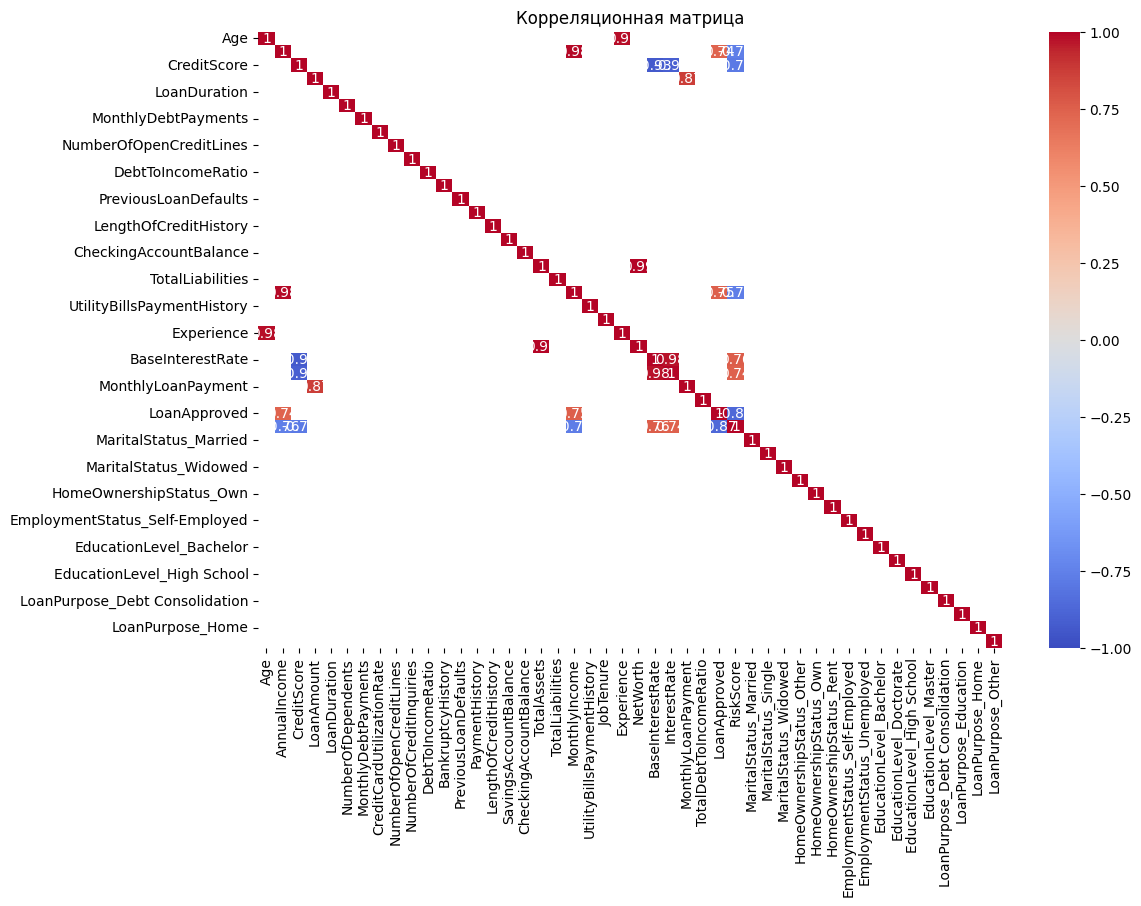

In [261]:
corr_matrix = x_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[corr_matrix.abs() >= 0.7], annot=True,  cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

Удалим столбцы с высоким коэффициентом корреляции.

In [262]:
x_train = x_train.drop(["NetWorth", "Experience", "MonthlyLoanPayment",
                        "InterestRate", "AnnualIncome", "BaseInterestRate", "RiskScore"], axis=1)
x_test = x_test.drop(["NetWorth", "Experience", "MonthlyLoanPayment",
                        "InterestRate", "AnnualIncome", "BaseInterestRate", "ID"], axis=1)

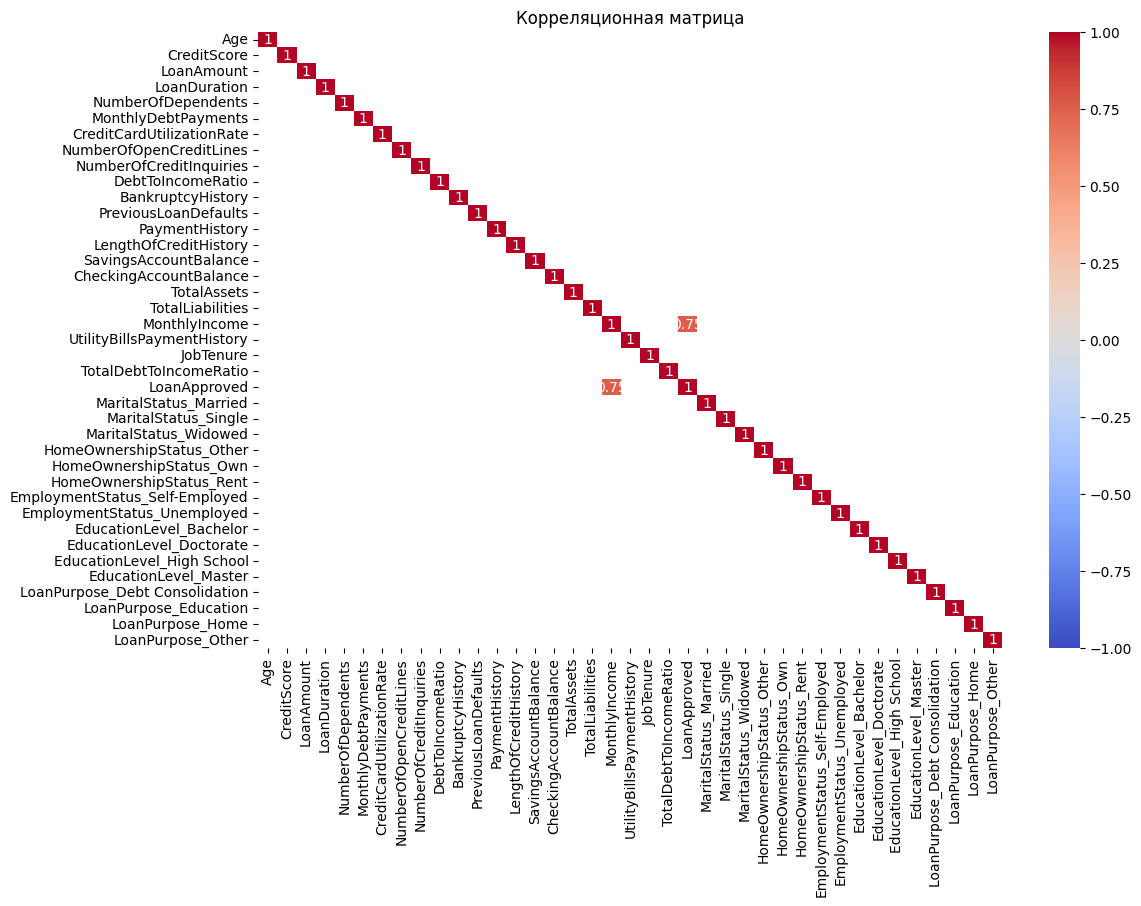

In [263]:
corr_matrix = x_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[corr_matrix.abs() >= 0.7], annot=True,  cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

(опытным путем было получено, что столбец MonthlyIncome лучше не удалять)

Выделим таргет из датасета.

In [264]:
y_train = x_train.LoanApproved
x_train = x_train.drop(["LoanApproved"], axis=1)
y_test = x_test.LoanApproved
x_test = x_test.drop(["LoanApproved"], axis=1)

### Нормализация

Используем Z-score нормализацию для данных.

In [265]:
from sklearn.preprocessing import StandardScaler

In [266]:
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)
x_train

,Age,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,...,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,-1.111860,-0.736675,-0.458262,0.271045,-0.399683,1.088754,-0.834293,-0.592693,0.020501,-0.564190,...,-0.322065,-0.206313,-0.646546,-0.185366,-0.821098,-0.27968,-0.570916,2.286841,-0.650214,-0.322065
1,1.305009,0.981312,-0.501464,-0.712006,-0.399683,-0.667339,-0.685576,-0.017923,-0.991767,-0.750923,...,-0.322065,-0.206313,-0.646546,-0.185366,1.217882,-0.27968,-0.570916,-0.437285,1.537956,-0.322065
2,0.959742,0.981312,0.315946,-0.712006,-1.105025,-0.001851,1.001318,-0.017923,-0.991767,-1.515888,...,-0.322065,-0.206313,1.546681,-0.185366,-0.821098,-0.27968,-0.570916,2.286841,-0.650214,-0.322065
3,-1.284494,0.964189,-0.388844,-0.220481,-1.105025,-0.782558,-0.605538,2.281157,-0.991767,0.897726,...,-0.322065,-0.206313,-0.646546,-0.185366,1.217882,-0.27968,1.751572,-0.437285,-0.650214,-0.322065
4,1.305009,0.981312,0.023083,-0.220481,0.305658,0.029933,-0.072460,-0.017923,0.020501,-1.255248,...,-0.322065,-0.206313,1.546681,-0.185366,-0.821098,-0.27968,1.751572,-0.437285,-0.650214,-0.322065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,0.614475,-0.171623,-0.890948,-1.695056,0.305658,-0.891817,-1.081045,2.855927,0.020501,0.427166,...,-0.322065,-0.206313,1.546681,-0.185366,-0.821098,-0.27968,-0.570916,-0.437285,1.537956,-0.322065
9328,-0.076059,0.981312,-0.808607,0.762570,2.421682,-0.538215,-0.438144,-0.592693,0.020501,-0.582721,...,-0.322065,-0.206313,-0.646546,-0.185366,-0.821098,-0.27968,-0.570916,-0.437285,1.537956,-0.322065
9329,1.477643,0.981312,-0.551038,-0.220481,0.305658,0.145152,1.209186,-1.167463,2.045038,-0.660101,...,-0.322065,-0.206313,-0.646546,-0.185366,-0.821098,-0.27968,-0.570916,2.286841,-0.650214,-0.322065
9330,-1.025543,-2.157867,0.789162,1.745620,-0.399683,0.296128,0.235686,-0.592693,-0.991767,-0.517206,...,-0.322065,-0.206313,1.546681,-0.185366,-0.821098,-0.27968,-0.570916,-0.437285,1.537956,-0.322065


## Обучение модели, предскаазание, метрики

In [267]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Мой класс логистической регресии

In [327]:
class LogitRegression() :
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function for model training
    def fit(self, x, y):
        # no_of_training_examples, no_of_features
        self.m, self.n = x.shape
        # weight initialization
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y

        for i in range(self.iterations):
            self.update_weights()
        return self


    def update_weights(self):
        a = 1 / (1 + np.exp(-(self.x.dot(self.w) + self.b)))

        tmp = (a - self.Y.T)
        tmp = np.reshape(tmp, self.m)
        dw = np.dot(self.x.T, tmp) / self.m
        db = np.sum(tmp) / self.m

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

        return self


    def predict(self, x):
        z = 1 / (1 + np.exp(-(x.dot(self.w) + self.b)))
        y = np.where(z > 0.5, 1, 0)
        return y

In [328]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [329]:
accuracy_my = accuracy_score(y_test, y_pred)
precision_my = precision_score(y_test, y_pred)
recall_my = recall_score(y_test, y_pred)
f1_score_my = f1_score(y_test, y_pred)

print("Accurancy: ", accuracy_my)
print("Precision: ", precision_my)
print("Recall: ", recall_my)
print("F1_score: ", f1_score_my)

Accurancy:  0.9142
Precision:  0.9190031152647975
Recall:  0.9143742735373886
F1_score:  0.9166828510390367


In [330]:
cm = confusion_matrix(y_test, y_pred)

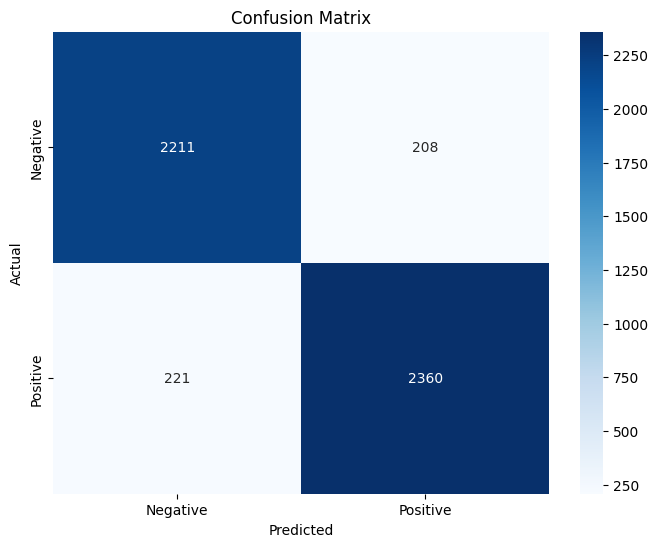

In [331]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Логистическая регрессия: sklearn

In [135]:
from sklearn.linear_model import LogisticRegression

In [290]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [288]:
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_score_lr = f1_score(y_test, y_pred)

print("Accurancy: ", accuracy_lr)
print("Precision: ", precision_lr)
print("Recall: ", recall_lr)
print("F1_score: ", f1_score_lr)

Accurancy:  0.9142
Precision:  0.9190031152647975
Recall:  0.9143742735373886
F1_score:  0.9166828510390367


In [291]:
cm = confusion_matrix(y_test, y_pred)

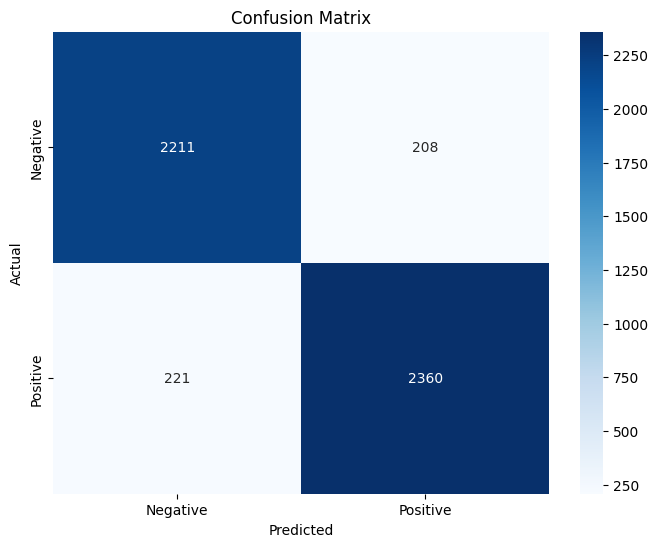

In [292]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### SVM: sklearn

In [138]:
from sklearn.svm import SVC

In [293]:
model = SVC()  # Выбор линейного ядра
model.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(x_test)

In [294]:
accuracy_svc = accuracy_score(y_test, y_pred)
precision_svc = precision_score(y_test, y_pred)
recall_svc = recall_score(y_test, y_pred)
f1_score_svc = f1_score(y_test, y_pred)

print("Accurancy: ", accuracy_svc)
print("Precision: ", precision_svc)
print("Recall: ", recall_svc)
print("F1_score: ", f1_score_svc)

Accurancy:  0.9234
Precision:  0.9337016574585635
Recall:  0.9166989538938396
F1_score:  0.9251221896383187


In [295]:
cm = confusion_matrix(y_test, y_pred)

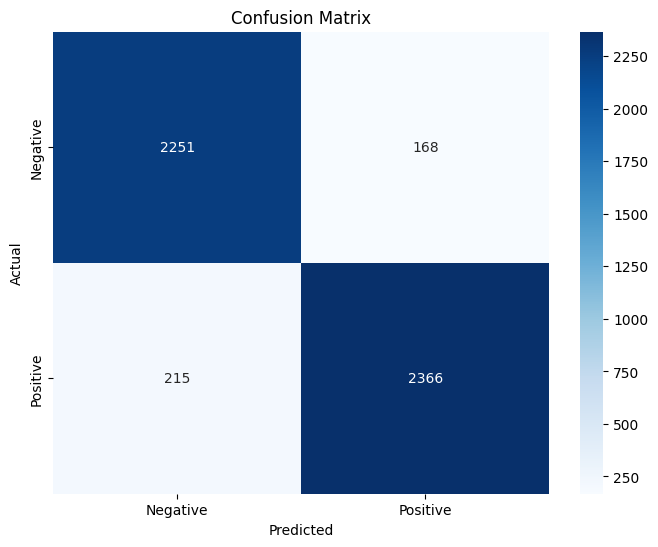

In [296]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Решающее дерево: sklearn

In [297]:
from sklearn.tree import DecisionTreeClassifier

In [298]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(x_test)

In [299]:
accuracy_tree = accuracy_score(y_test, y_pred)
precision_tree = precision_score(y_test, y_pred)
recall_tree = recall_score(y_test, y_pred)
f1_score_tree = f1_score(y_test, y_pred)

print("Accurancy: ", accuracy_tree)
print("Precision: ", precision_tree)
print("Recall: ", recall_tree)
print("F1_score: ", f1_score_tree)

Accurancy:  0.9062
Precision:  0.9030534351145039
Recall:  0.9166989538938396
F1_score:  0.9098250336473755


In [300]:
cm = confusion_matrix(y_test, y_pred)

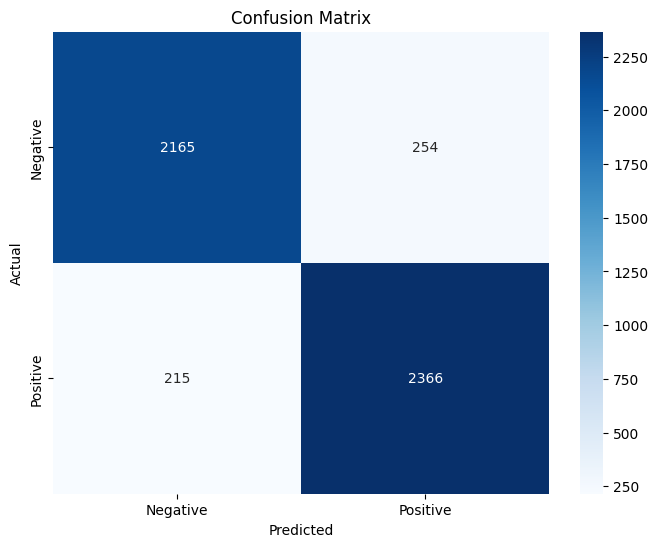

In [301]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

При увеличении и уменьшении глубины значение метрик уменьшается.

### Случайный лес: sklearn

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [302]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(x_test)

In [303]:
accuracy_forest = accuracy_score(y_test, y_pred)
precision_forest = precision_score(y_test, y_pred)
recall_forest = recall_score(y_test, y_pred)
f1_score_forest = f1_score(y_test, y_pred)

print("Accurancy: ", accuracy_forest)
print("Precision: ", precision_forest)
print("Recall: ", recall_forest)
print("F1_score: ", f1_score_forest)

Accurancy:  0.9188
Precision:  0.9273084479371316
Recall:  0.9143742735373886
F1_score:  0.9207959422551697


In [304]:
cm = confusion_matrix(y_test, y_pred)

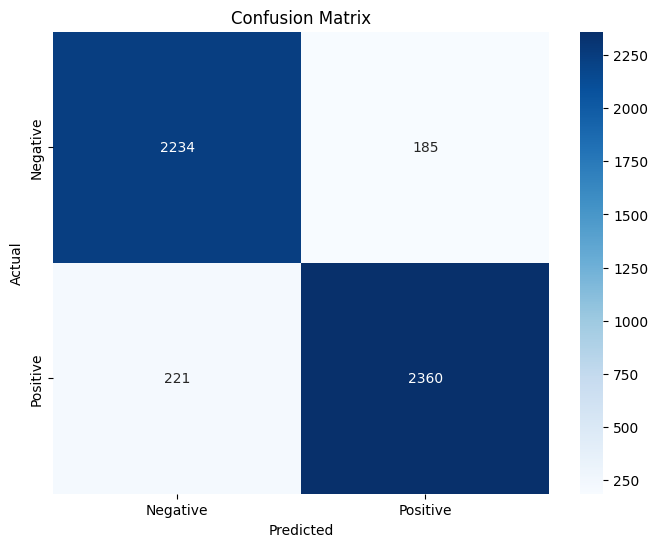

In [305]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Чем больше деревьев, тем лучше, к переобучению не приводит. Однако и к улучшению метрик тоже не приводит, но замедляет обучение модели

### Градиентный бустинг: sklearn

In [306]:
from sklearn.ensemble import GradientBoostingClassifier

In [307]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(x_test)

In [309]:
accuracy_boost = accuracy_score(y_test, y_pred)
precision_boost = precision_score(y_test, y_pred)
recall_boost = recall_score(y_test, y_pred)
f1_score_boost = f1_score(y_test, y_pred)

print("Accurancy: ", accuracy_boost)
print("Precision: ", precision_boost)
print("Recall: ", recall_boost)
print("F1_score: ", f1_score_boost)

Accurancy:  0.9272
Precision:  0.9278270937861829
Recall:  0.9314219294846958
F1_score:  0.9296210363495746


In [310]:
cm = confusion_matrix(y_test, y_pred)

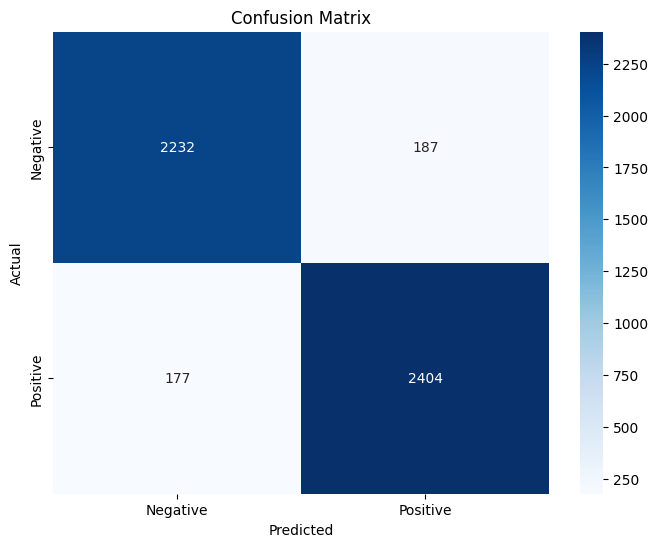

In [311]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Градиентный бустинг: LightGBM

In [184]:
%pip install lightgbm

In [312]:
import lightgbm as lgb

In [313]:
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4789, number of negative: 4543
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3280
[LightGBM] [Info] Number of data points in the train set: 9332, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513180 -> initscore=0.052734
[LightGBM] [Info] Start training from score 0.052734


In [314]:
accuracy_lgb = accuracy_score(y_test, y_pred)
precision_lgb = precision_score(y_test, y_pred)
recall_lgb = recall_score(y_test, y_pred)
f1_score_lgb = f1_score(y_test, y_pred)

print("Accurancy: ", accuracy_lgb)
print("Precision: ", precision_lgb)
print("Recall: ", recall_lgb)
print("F1_score: ", f1_score_lgb)

Accurancy:  0.9234
Precision:  0.9296325254104769
Recall:  0.9213483146067416
F1_score:  0.9254718816890446


In [315]:
cm = confusion_matrix(y_test, y_pred)

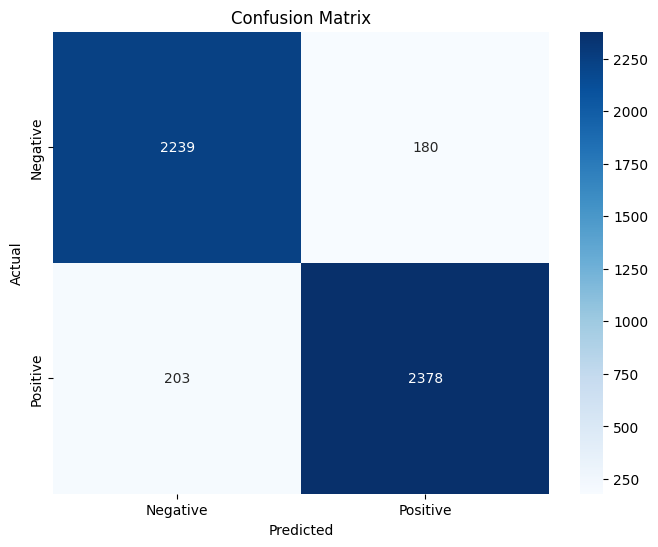

In [316]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Градиентный бустинг: XGBoost

In [189]:
%pip install xgboost

In [317]:
import xgboost as xgb

In [318]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(x_test)

In [319]:
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_score_xgb = f1_score(y_test, y_pred)

print("Accurancy: ", accuracy_xgb)
print("Precision: ", precision_xgb)
print("Recall: ", recall_xgb)
print("F1_score: ", f1_score_xgb)

Accurancy:  0.9172
Precision:  0.900850906400296
Recall:  0.9434327779930259
F1_score:  0.9216502649507948


In [320]:
cm = confusion_matrix(y_test, y_pred)

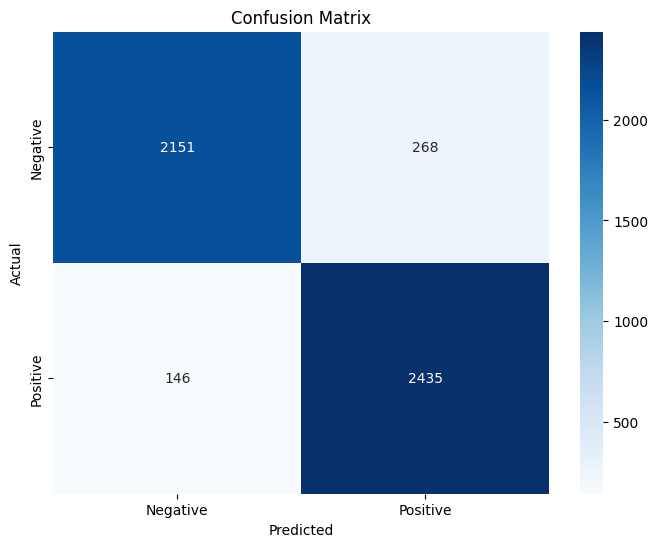

In [321]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Градиентный бустинг: catboost

In [193]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.7 MB/s eta 0:00:00


In [322]:
from catboost import CatBoostClassifier

In [323]:
model = CatBoostClassifier()
model.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(x_test)

Learning rate set to 0.026737
0:	learn: 0.6585097	total: 8.86ms	remaining: 8.85s
1:	learn: 0.6285240	total: 16.8ms	remaining: 8.4s
2:	learn: 0.5986675	total: 24.8ms	remaining: 8.23s
3:	learn: 0.5716456	total: 32.9ms	remaining: 8.18s
4:	learn: 0.5403164	total: 40.6ms	remaining: 8.07s
5:	learn: 0.5117021	total: 48.4ms	remaining: 8.02s
6:	learn: 0.4902844	total: 56.4ms	remaining: 8s
7:	learn: 0.4713854	total: 64.7ms	remaining: 8.02s
8:	learn: 0.4541127	total: 72.9ms	remaining: 8.03s
9:	learn: 0.4400257	total: 80.6ms	remaining: 7.98s
10:	learn: 0.4238694	total: 89ms	remaining: 8s
11:	learn: 0.4093070	total: 99.2ms	remaining: 8.17s
12:	learn: 0.3963144	total: 107ms	remaining: 8.15s
13:	learn: 0.3847710	total: 115ms	remaining: 8.13s
14:	learn: 0.3738317	total: 123ms	remaining: 8.09s
15:	learn: 0.3633580	total: 131ms	remaining: 8.04s
16:	learn: 0.3564266	total: 139ms	remaining: 8.01s
17:	learn: 0.3445974	total: 146ms	remaining: 7.98s
18:	learn: 0.3353314	total: 154ms	remaining: 7.97s
19:	lear

In [324]:
accuracy_cat = accuracy_score(y_test, y_pred)
precision_cat = precision_score(y_test, y_pred)
recall_cat = recall_score(y_test, y_pred)
f1_score_cat = f1_score(y_test, y_pred)

print("Accurancy: ", accuracy_cat)
print("Precision: ", precision_cat)
print("Recall: ", recall_cat)
print("F1_score: ", f1_score_cat)

Accurancy:  0.9238
Precision:  0.9270186335403726
Recall:  0.9252227818674932
F1_score:  0.9261198371146016


In [325]:
cm = confusion_matrix(y_test, y_pred)

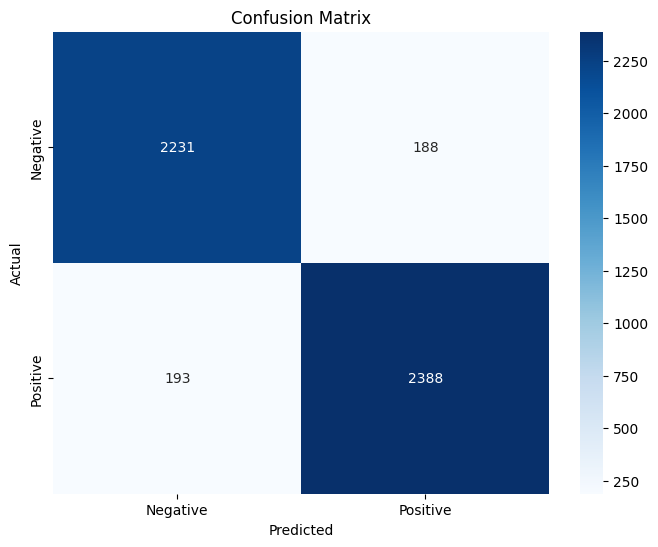

In [326]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Выводы

Моя логистическая регрессия сработала так же, как и встроенная в модуль sklearn (дала такие же метрики). В модели решающего дерева я подбирала максимальную глубину, т к скольком большая глубина могла привести к переобучению. В то же время в модели случайного леса я сразу выставила большое число, что дало хорошие метрики. Случайный лес не приводит к переобучению, но при очень большой глубине заметно увеличивается время обучения модели (при увеличении максимальной глубины от 100 до 200 время обучения увеличилось в два раза: от 3 секунд, до 7). В разделе градиентного бустинга LightGBM потратило мало времени на обучение и при этом дала неплохие результаты.

Наиболее информативная метрика является F1-score, т к она учитывает и precission и recall.
Однако более наглядной является confusion matrix - матрица ошибок. Лучше всего себя показал градиеентный бустинг из sklearn. LightGBM на 3 месте по метрике F1-score, уступает 0,001 catboost. Однако определенно на 1 месте по скорости выполнения.